## Data Preparation:

In [4]:
dow_jones_30_tickers = [
    'AMZN',  # Amazon
    'AAPL',  # Apple Inc.
    'AMGN',  # Amgen Inc.
    'AXP',   # American Express Company
    'BA',    # Boeing Company
    'CAT',   # Caterpillar Inc.
    'CRM',   # Salesforce.com Inc.
    'CSCO',  # Cisco Systems Inc.
    'CVX',   # Chevron Corporation
    'DIS',   # Walt Disney Company
     #'DOW',   # Dow Inc.
    'GS',    # Goldman Sachs Group Inc.
    'HD',    # Home Depot Inc.
    'HON',   # Honeywell International Inc.
    'IBM',   # International Business Machines Corporation
    'INTC',  # Intel Corporation
    'JNJ',   # Johnson & Johnson
    'JPM',   # JPMorgan Chase & Co.
    'KO',    # Coca-Cola Company
    'MCD',   # McDonald's Corp
    'MMM',   # 3M Company
    'MRK',   # Merck & Co., Inc.
    'MSFT',  # Microsoft Corporation
    'NKE',   # NIKE Inc.
    'PG',    # Procter & Gamble Company
    'TRV',   # The Travelers Companies Inc.
    'UNH',   # UnitedHealth Group Incorporated
    #'V',     # Visa Inc. (Missing Data is Ingored)
    'VZ',    # Verizon Communications Inc.
    'WBA',   # Walgreens Boots Alliance Inc.
    'WMT'    # Walmart Inc.
]


In [5]:
# We need to import the data from yahoo finance
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

tickers_list = dow_jones_30_tickers
num_stocks = len(tickers_list)
start_date = datetime.datetime(2005, 1, 1)
end_date = datetime.datetime(2024, 2, 1)
data = yf.download(tickers_list, start_date, end_date)['Adj Close']
data

[*********************100%%**********************]  29 of 29 completed


Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,0.955513,46.209225,2.226000,36.503849,35.678852,28.888977,4.144586,13.101845,24.714954,22.538610,...,34.699955,14.845136,18.626942,8.987715,32.082806,23.430439,34.892651,13.871128,25.036613,11.927421
2005-01-04,0.965326,45.475967,2.107000,35.955395,34.985844,28.569912,4.084664,12.586448,24.545006,22.295828,...,34.417801,14.783407,18.696602,8.859871,31.681698,23.298342,34.534138,13.730673,24.856796,11.898366
2005-01-05,0.973781,44.757107,2.088500,35.621704,35.566860,28.022942,4.481646,12.593233,24.705242,22.174429,...,33.996693,14.883135,18.654810,8.753834,32.013054,23.260616,34.654984,13.710114,25.495426,11.914011
2005-01-06,0.974535,45.174053,2.052500,35.438480,35.335857,28.436205,4.424221,12.783116,25.117964,22.206800,...,34.304104,14.987611,18.633913,8.742929,32.169987,23.367544,35.420349,13.680711,25.507820,12.083931
2005-01-07,1.045493,45.267513,2.116000,35.176750,35.216835,28.375420,4.381776,12.694961,24.836351,21.988297,...,34.657833,14.783407,18.578192,8.691394,32.507172,23.260616,35.138374,13.632287,25.731049,12.070508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,193.659882,307.853394,157.750000,187.489120,201.880005,299.677582,278.665985,51.905933,146.966339,94.860001,...,78.682678,119.372795,403.395050,100.411247,154.621582,210.561249,491.462585,41.616077,22.850803,54.095760
2024-01-26,191.914474,309.351654,159.119995,200.807831,205.470001,298.342468,279.574799,51.717472,147.530182,95.360001,...,78.690865,120.058449,402.458496,102.384201,155.138260,210.471649,501.224121,41.724323,22.593719,54.570812
2024-01-29,191.226273,311.018646,161.259995,200.239609,205.190002,302.148590,287.484467,51.866257,147.470840,97.489998,...,79.010582,120.515549,408.227386,103.510178,155.158127,210.163055,502.558868,41.379898,22.465176,54.826603


In [6]:
# Training and testing split:
train_size = 0.7
val_size = 0.15
test_size = 0.15

# Calculate the indices for splitting
num_rows = len(data)
train_end_index = int(num_rows * train_size)
val_end_index = train_end_index + int(num_rows * val_size)

# Split the data
train_data = data.iloc[:train_end_index]
val_data = data.iloc[train_end_index:val_end_index]
test_data = data.iloc[val_end_index:]
print("Train data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (3361, 29)
Validation data shape: (720, 29)
Test data shape: (721, 29)


In [69]:
train_data

Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,0.955513,46.209225,2.226000,36.503849,35.678852,28.888977,4.144586,13.101845,24.714954,22.538610,...,34.699955,14.845136,18.626942,8.987715,32.082806,23.430439,34.892651,13.871128,25.036613,11.927421
2005-01-04,0.965326,45.475967,2.107000,35.955395,34.985844,28.569912,4.084664,12.586448,24.545006,22.295828,...,34.417801,14.783407,18.696602,8.859871,31.681698,23.298342,34.534138,13.730673,24.856796,11.898366
2005-01-05,0.973781,44.757107,2.088500,35.621704,35.566860,28.022942,4.481646,12.593233,24.705242,22.174429,...,33.996693,14.883135,18.654810,8.753834,32.013054,23.260616,34.654984,13.710114,25.495426,11.914011
2005-01-06,0.974535,45.174053,2.052500,35.438480,35.335857,28.436205,4.424221,12.783116,25.117964,22.206800,...,34.304104,14.987611,18.633913,8.742929,32.169987,23.367544,35.420349,13.680711,25.507820,12.083931
2005-01-07,1.045493,45.267513,2.116000,35.176750,35.216835,28.375420,4.381776,12.694961,24.836351,21.988297,...,34.657833,14.783407,18.578192,8.691394,32.507172,23.260616,35.138374,13.632287,25.731049,12.070508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-03,41.877613,138.692184,78.603996,89.231743,316.700867,124.680328,124.247704,37.043770,97.281143,95.732582,...,123.052628,45.813297,87.899597,62.826603,60.983719,110.828377,214.264954,35.154995,48.196690,25.903399
2018-05-04,43.520618,140.017517,79.047501,90.343246,320.282654,126.926270,124.956772,37.760635,96.910553,98.049324,...,125.366776,45.988499,88.918121,63.953506,61.898155,112.917686,215.866333,35.412189,49.420376,26.293917
2018-05-07,43.835484,140.084198,80.007004,90.554535,326.028870,129.917999,126.804359,38.119068,96.455109,99.338554,...,125.932777,45.693848,89.908600,65.118019,61.513592,112.290886,213.926392,35.074158,48.250885,25.675098


In [7]:
# Calcuate returns
def return_calculation(ticker,data):
  stickers_return = pd.DataFrame(columns=[tickers_list])
  for i in tickers_list:
    stickers_return[i]= (data[i]/data[i].shift(1)-1).dropna()
  return stickers_return

tr_returns = return_calculation(dow_jones_30_tickers,train_data)
val_returns = return_calculation(dow_jones_30_tickers,val_data)
te_returns = return_calculation(dow_jones_30_tickers,test_data)

print(tr_returns.shape)
print(val_returns.shape)
print(te_returns.shape)

(3360, 29)
(719, 29)
(720, 29)


In [70]:
len(chunks)

24

In [85]:
chunk_size = 30
chunks = [tr_returns.iloc[i:i + chunk_size] for i in range(0, len(tr_returns), chunk_size)]
first_chunk = chunks[0]
print(first_chunk.shape)
first_chunk.head(10)


(30, 29)


,AMZN,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,-0.053459,0.010270,-0.015868,-0.015025,-0.019424,-0.011045,-0.014458,-0.039338,-0.006876,-0.010772,...,-0.008131,-0.004158,0.003740,-0.014224,-0.012502,-0.005638,-0.010275,-0.010126,-0.007182,-0.002436
2005-01-05,-0.008780,0.008758,-0.015807,-0.009281,0.016607,-0.019145,0.097188,0.000539,0.006528,-0.005445,...,-0.012235,0.006746,-0.002235,-0.011968,0.010459,-0.001619,0.003499,-0.001497,0.025692,0.001315
2005-01-06,-0.017237,0.000775,0.009316,-0.005144,-0.006495,0.014747,-0.012813,0.015078,0.016706,0.001460,...,0.009042,0.007020,-0.001120,-0.001246,0.004902,0.004597,0.022085,-0.002145,0.000486,0.014262
2005-01-07,0.030938,0.072811,0.002069,-0.007385,-0.003368,-0.002138,-0.009594,-0.006896,-0.011212,-0.009840,...,0.010312,-0.013625,-0.002990,-0.005894,0.010481,-0.004576,-0.007961,-0.003540,0.008751,-0.001111
2005-01-10,-0.011342,-0.004187,0.010640,0.002046,0.013318,-0.009209,-0.032479,0.000000,0.004496,0.004049,...,0.019927,0.011885,0.004874,0.009920,0.007868,0.002433,0.004242,-0.009642,0.003373,-0.005001
2005-01-11,-0.004780,-0.063806,0.002200,-0.009281,-0.003138,-0.013835,-0.032980,-0.004274,0.000389,-0.002566,...,0.009173,-0.010476,-0.002612,-0.004742,-0.001065,0.006205,-0.001027,-0.011017,0.000721,-0.002420
2005-01-12,0.015850,0.013941,0.017090,-0.002248,0.022038,0.012385,-0.080390,0.015558,0.021206,0.018743,...,0.002951,-0.002887,0.001871,0.004991,0.003730,0.006434,0.006628,-0.009585,0.005999,0.009143
2005-01-13,0.007092,0.066300,-0.015107,-0.006949,-0.025222,0.005304,0.009934,-0.007924,-0.008192,0.001082,...,-0.013771,-0.013835,-0.019044,-0.006434,-0.017342,-0.006660,0.003519,-0.029558,-0.015267,-0.008136
2005-01-14,0.045775,0.005730,-0.001252,-0.003026,0.005531,0.008938,-0.016393,0.005324,0.004610,0.019820,...,0.002148,0.007178,-0.005710,0.010565,0.006303,0.005363,0.013121,-0.007008,0.008479,0.006525


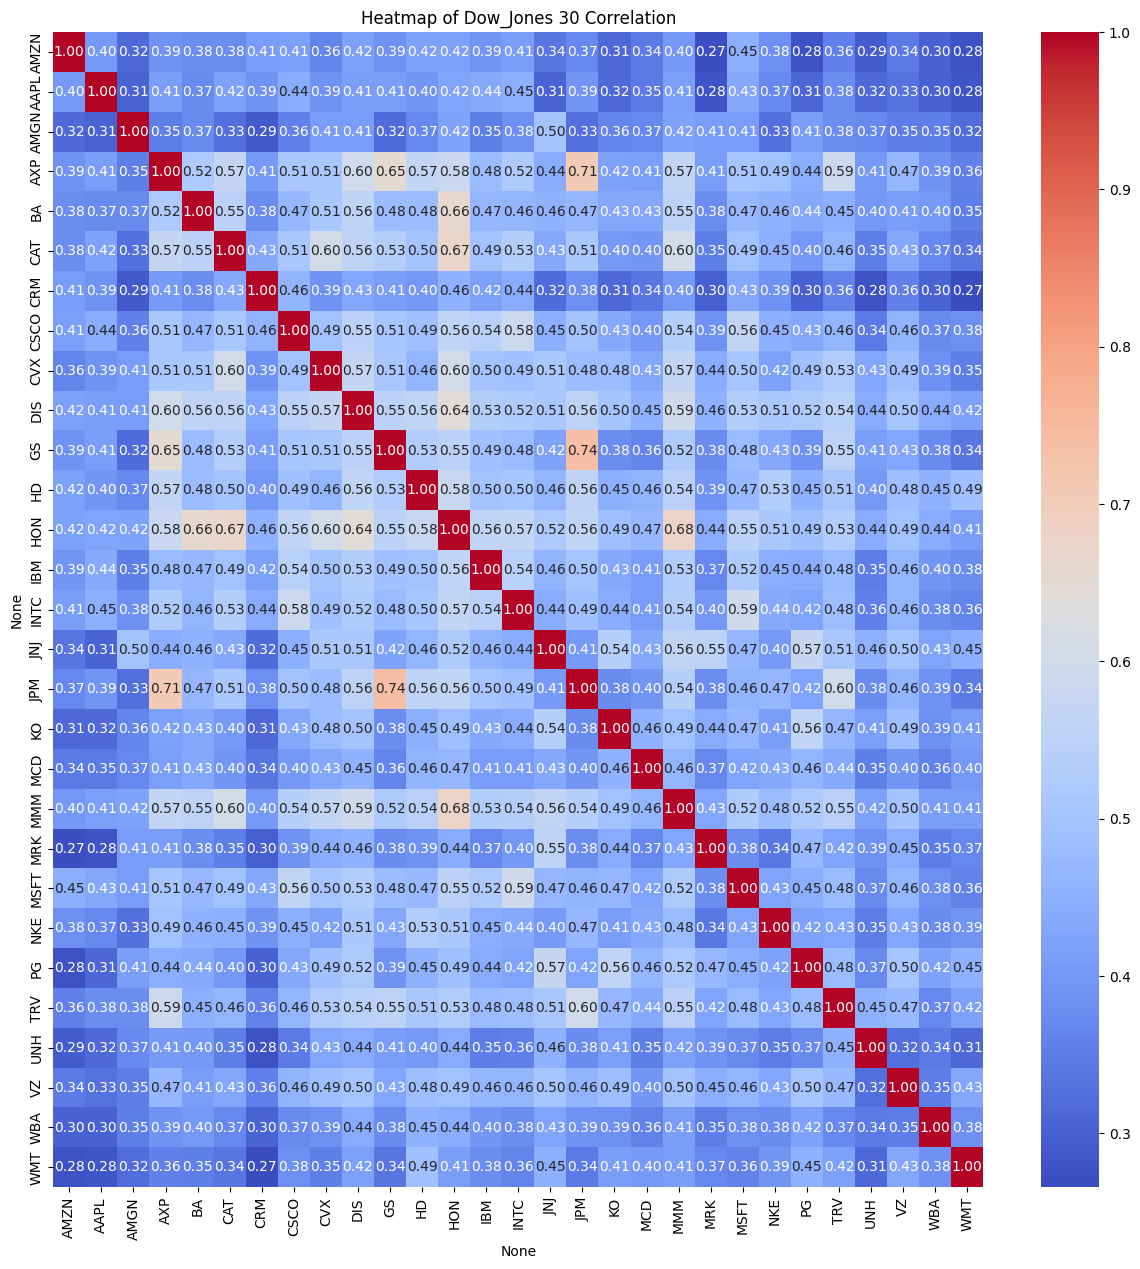

In [86]:
#cov_matrix
import seaborn as sns
corr = tr_returns.corr()
# Plotting the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Dow_Jones 30 Correlation')
plt.show()


In [87]:
cov_matrix = tr_returns.cov()

## Key Calcuations

In [88]:
# Mean Return of Portflio:
mean_return = np.mean(tr_returns, axis=0)
annual_mean_return = mean_return

# Calcuate covariance Matrix
cov_matrix  = np.cov(tr_returns,rowvar=False)
cov_annualized = np.array(cov_matrix)


# std calcuation
def std(weights,cov_matrix):
  var = weights.T @ cov_matrix @ weights
  return np.sqrt(var)

# expected returns calcuations
def expected_returns(weights,returns):
  return np.sum(weights.T @ np.mean(returns))

# Sharpe Ratio Calcuations
def sharp(weights,returns,cov_matrix,risk_free_rate):
  return (expected_returns(weights,returns) - risk_free_rate) / std(weights,cov_matrix)
def neg_sharp(weights,returns,cov_matrix,risk_free_rate):
  return -(expected_returns(weights,returns) - risk_free_rate) / std(weights,cov_matrix)

risk_free_rate = 0.0473 # 30 year bond rate

## Triditional Optimziation

### Markowitz  portfolio (minimization risk problem)

In [115]:
import cvxpy as cp
r_min_annualized = 0.15

# create cvxpy variable to minimize
w = cp.Variable(num_stocks)
r_min = r_min_annualized / 252

# construct the objective function and constraints
obj = cp.Minimize(w.T @ cov_matrix @ w)
const = [
    cp.sum(w) == 1, w >= 0,
    w.T @ mean_return- r_min >= 0
]

# solve
prob = cp.Problem(obj, const)
opt_v = prob.solve()

risk_opt = (opt_v * 252) ** 0.5
w_opt_1 = w.value
Markowitz_min_risk_weights = w_opt_1
print('optimal risk (%):', risk_opt)
print('optimal proportion:', np.round(w_opt_1, 2))

optimal risk (%): 0.12027875392993391
optimal proportion: [ 0.    0.08  0.    0.11 -0.    0.    0.01  0.    0.05  0.06 -0.    0.
  0.23  0.    0.    0.   -0.    0.    0.17  0.    0.02  0.    0.    0.16
 -0.   -0.    0.1   0.    0.  ]


### Markowitz  portfolio (Max return problem)

In [116]:
import cvxpy as cvx
import numpy as np

def markowitz_portfolio(means, cov, risk_aversion):
    weights = cvx.Variable(num_stocks)
    expected_return = weights.T @ mean_return
    expected_vol = cvx.quad_form(weights, cov_matrix)

    utility = expected_return - risk_aversion * expected_vol
    objective = cvx.Maximize(utility)

    constraints = [
        cvx.sum(weights) == 1,
        weights >= 0,       # long-only
        weights <= 0.3,     # Maxweight Concentration (adjustable)
        cvx.sum(cvx.abs(weights)) <= 1 # Leverage max.
    ]

    problem = cvx.Problem(objective, constraints)
    problem.solve()

    return np.array(weights.value.flat).round(2), expected_return.value, expected_vol.value



expected_rets = annual_mean_return
cov = cov_matrix
risk_aversion = 0.5     # adjustable

w_opt_2, rets, var = markowitz_portfolio(expected_rets, cov, risk_aversion)
Markowitz_max_retruns_weights = w_opt_2


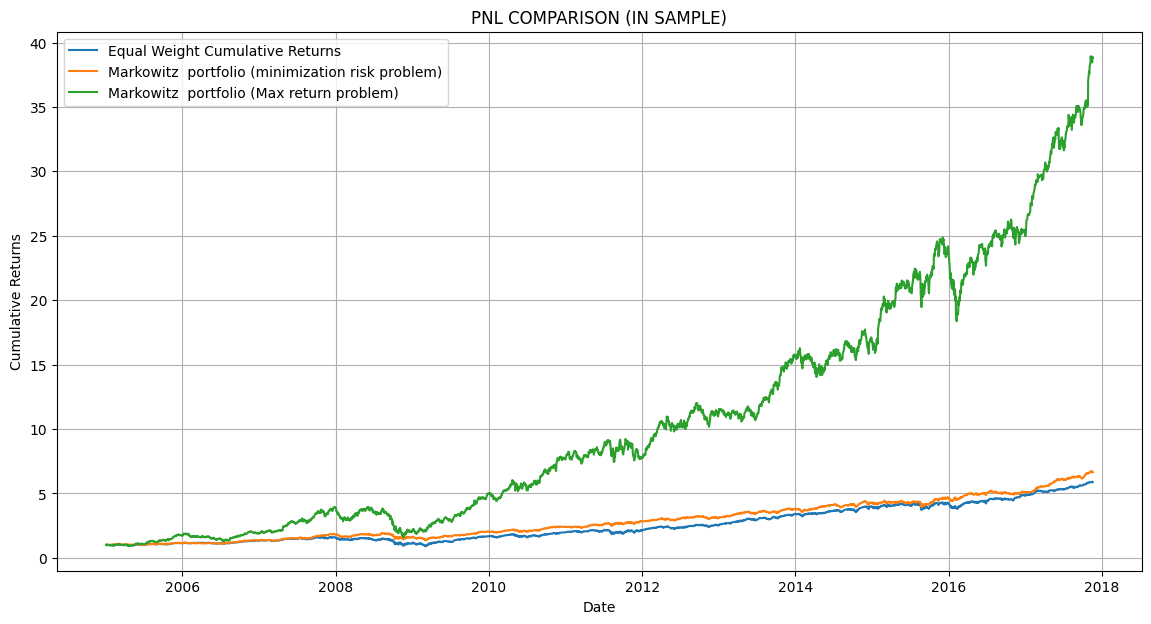

,Portfolio,Mean Annual Return,Std. Annual Return,Sharpe Ratio
0,Equal Weight,0.161134,0.180778,0.629689
1,Markowitz Min Risk,0.164023,0.140223,0.832408
2,Markowitz Max Return,0.367610,0.278762,1.149046


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming the returns dataframe is provided in a similar format as in the screenshot
returns_data = tr_returns

dates = pd.date_range(start='2005, 1, 1', periods=len(returns_data['AAPL']), freq='B')
returns_df = pd.DataFrame(data=returns_data, index=dates)

# Equal weight
equal_weights = np.array([1/num_stocks] * num_stocks) # Equal weights for 5 assets
equal_weighted_returns = (returns_df * equal_weights).sum(axis=1)
cumulative_equal_weighted_returns = (1 + equal_weighted_returns).cumprod()

# Optimal weights
optimal_weights = w_opt_1
optimal_weighted_returns = (returns_df * optimal_weights).sum(axis=1)
cumulative_optimal_weighted_returns = (1 + optimal_weighted_returns).cumprod()


# Optimal weights2
optimal_weights2 = w_opt_2
optimal_weighted_returns2 = (returns_df * optimal_weights2).sum(axis=1)
cumulative_optimal_weighted_returns2 = (1 + optimal_weighted_returns2).cumprod()


# Plotting the cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(cumulative_equal_weighted_returns, label='Equal Weight Cumulative Returns')
plt.plot(cumulative_optimal_weighted_returns, label='Markowitz  portfolio (minimization risk problem)')
plt.plot(cumulative_optimal_weighted_returns2, label='Markowitz  portfolio (Max return problem)')

plt.title('PNL COMPARISON (IN SAMPLE)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Function to calculate annualized metrics
def annualize_metrics(daily_returns, risk_free_rate, trading_days=252):
    mean_daily_return = np.mean(daily_returns)
    std_daily_return = np.std(daily_returns)
    mean_annual_return = (1 + mean_daily_return) ** trading_days - 1
    std_annual_return = std_daily_return * np.sqrt(trading_days)
    sharpe_ratio = (mean_annual_return - risk_free_rate) / std_annual_return
    return mean_annual_return, std_annual_return, sharpe_ratio

# Calculate the metrics for each portfolio
ew_mean_annual_return, ew_std_annual_return, ew_sharpe_ratio = annualize_metrics(equal_weighted_returns, risk_free_rate)
opt1_mean_annual_return, opt1_std_annual_return, opt1_sharpe_ratio = annualize_metrics(optimal_weighted_returns, risk_free_rate)
opt2_mean_annual_return, opt2_std_annual_return, opt2_sharpe_ratio = annualize_metrics(optimal_weighted_returns2, risk_free_rate)

# Create a DataFrame to hold the results
portfolios_comparison = pd.DataFrame({
    'Portfolio': ['Equal Weight', 'Markowitz Min Risk', 'Markowitz Max Return'],
    'Mean Annual Return': [ew_mean_annual_return, opt1_mean_annual_return, opt2_mean_annual_return],
    'Std. Annual Return': [ew_std_annual_return, opt1_std_annual_return, opt2_std_annual_return],
    'Sharpe Ratio': [ew_sharpe_ratio, opt1_sharpe_ratio, opt2_sharpe_ratio]
})

portfolios_comparison

In [92]:
returns_data = tr_returns

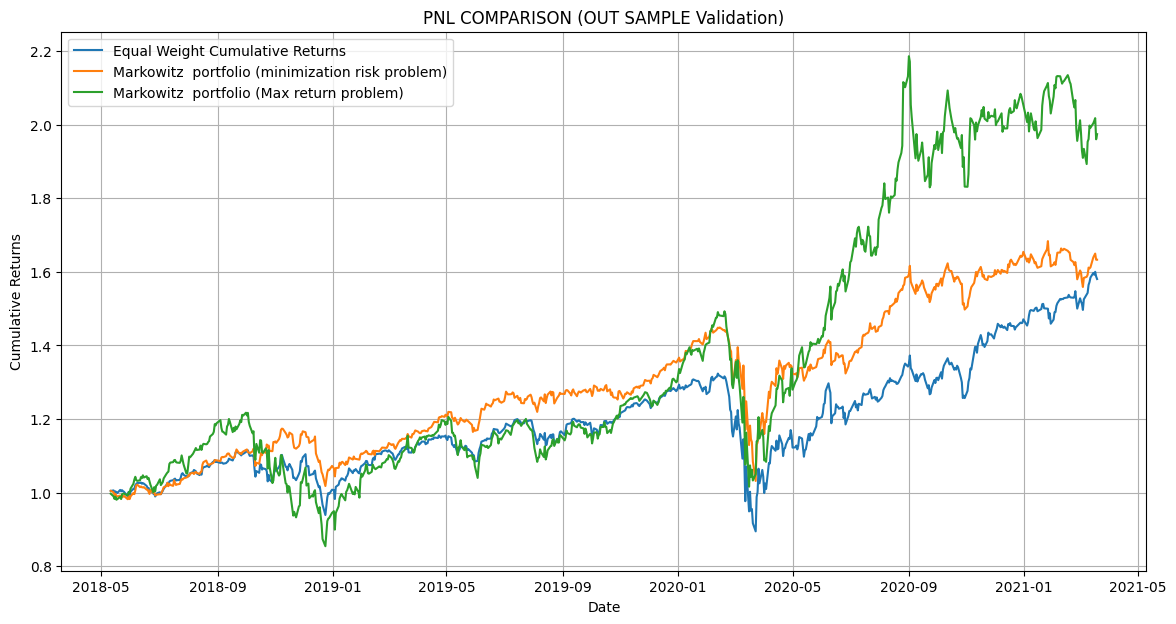

,Portfolio,Mean Annual Return,Std. Annual Return,Sharpe Ratio
0,Equal Weight,0.206808,0.234388,0.680530
1,Markowitz Min Risk,0.211663,0.200597,0.819368
2,Markowitz Max Return,0.332350,0.311223,0.915904


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming the returns dataframe is provided in a similar format as in the screenshot
returns_data = tr_returns + te_returns

dates = pd.date_range(start='2005, 1, 1', periods=len(returns_data['AAPL']), freq='B')
returns_df = pd.DataFrame(data=returns_data, index=dates)

# Equal weight
equal_weights = np.array([1/num_stocks] * num_stocks) # Equal weights for 5 assets
equal_weighted_returns = (val_returns * equal_weights).sum(axis=1)
cumulative_equal_weighted_returns = (1 + equal_weighted_returns).cumprod()

# Optimal weights
optimal_weights = w_opt_1
optimal_weighted_returns = (val_returns * optimal_weights).sum(axis=1)
cumulative_optimal_weighted_returns = (1 + optimal_weighted_returns).cumprod()


# Optimal weights2
optimal_weights2 = w_opt_2
optimal_weighted_returns2 = (val_returns * optimal_weights2).sum(axis=1)
cumulative_optimal_weighted_returns2 = (1 + optimal_weighted_returns2).cumprod()


# Plotting the cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(cumulative_equal_weighted_returns, label='Equal Weight Cumulative Returns')
plt.plot(cumulative_optimal_weighted_returns, label='Markowitz  portfolio (minimization risk problem)')
plt.plot(cumulative_optimal_weighted_returns2, label='Markowitz  portfolio (Max return problem)')

plt.title('PNL COMPARISON (OUT SAMPLE Validation)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the metrics for each portfolio
ew_mean_annual_return, ew_std_annual_return, ew_sharpe_ratio = annualize_metrics(equal_weighted_returns, risk_free_rate)
opt1_mean_annual_return, opt1_std_annual_return, opt1_sharpe_ratio = annualize_metrics(optimal_weighted_returns, risk_free_rate)
opt2_mean_annual_return, opt2_std_annual_return, opt2_sharpe_ratio = annualize_metrics(optimal_weighted_returns2, risk_free_rate)

# Create a DataFrame to hold the results
portfolios_comparison = pd.DataFrame({
    'Portfolio': ['Equal Weight', 'Markowitz Min Risk', 'Markowitz Max Return'],
    'Mean Annual Return': [ew_mean_annual_return, opt1_mean_annual_return, opt2_mean_annual_return],
    'Std. Annual Return': [ew_std_annual_return, opt1_std_annual_return, opt2_std_annual_return],
    'Sharpe Ratio': [ew_sharpe_ratio, opt1_sharpe_ratio, opt2_sharpe_ratio]
})

portfolios_comparison

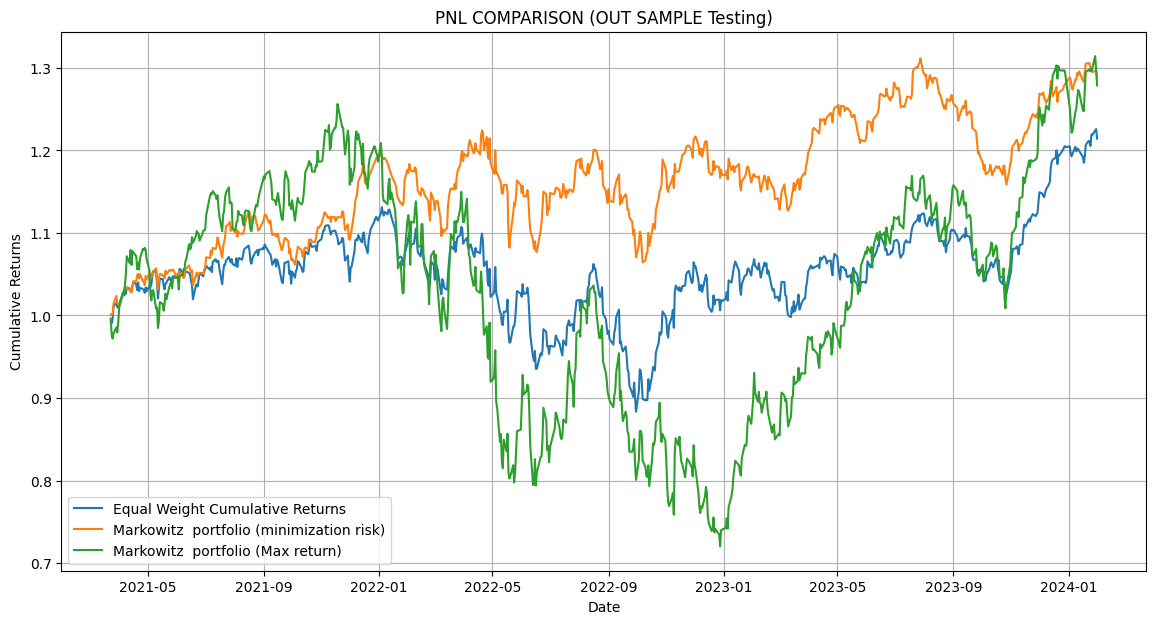

,Portfolio,Mean Annual Return,Std. Annual Return,Sharpe Ratio
0,Equal Weight,0.082678,0.151392,0.233687
1,Markowitz Min Risk,0.101938,0.129752,0.421096
2,Markowitz Max Return,0.132820,0.277798,0.307849


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming the returns dataframe is provided in a similar format as in the screenshot
returns_data = tr_returns

dates = pd.date_range(start='2005, 1, 1', periods=len(returns_data['AAPL']), freq='B')
returns_df = pd.DataFrame(data=returns_data, index=dates)

# Equal weight
equal_weights = np.array([1/num_stocks] * num_stocks) # Equal weights for 5 assets
equal_weighted_returns = (te_returns * equal_weights).sum(axis=1)
cumulative_equal_weighted_returns = (1 + equal_weighted_returns).cumprod()

# Optimal weights
optimal_weights = w_opt_1
optimal_weighted_returns = (te_returns * optimal_weights).sum(axis=1)
cumulative_optimal_weighted_returns = (1 + optimal_weighted_returns).cumprod()


# Optimal weights2
optimal_weights2 = w_opt_2
optimal_weighted_returns2 = (te_returns * optimal_weights2).sum(axis=1)
cumulative_optimal_weighted_returns2 = (1 + optimal_weighted_returns2).cumprod()


# Plotting the cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(cumulative_equal_weighted_returns, label='Equal Weight Cumulative Returns')
plt.plot(cumulative_optimal_weighted_returns, label='Markowitz  portfolio (minimization risk)')
plt.plot(cumulative_optimal_weighted_returns2, label='Markowitz  portfolio (Max return)')

plt.title('PNL COMPARISON (OUT SAMPLE Testing)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the metrics for each portfolio
ew_mean_annual_return, ew_std_annual_return, ew_sharpe_ratio = annualize_metrics(equal_weighted_returns, risk_free_rate)
opt1_mean_annual_return, opt1_std_annual_return, opt1_sharpe_ratio = annualize_metrics(optimal_weighted_returns, risk_free_rate)
opt2_mean_annual_return, opt2_std_annual_return, opt2_sharpe_ratio = annualize_metrics(optimal_weighted_returns2, risk_free_rate)

# Create a DataFrame to hold the results
portfolios_comparison = pd.DataFrame({
    'Portfolio': ['Equal Weight', 'Markowitz Min Risk', 'Markowitz Max Return'],
    'Mean Annual Return': [ew_mean_annual_return, opt1_mean_annual_return, opt2_mean_annual_return],
    'Std. Annual Return': [ew_std_annual_return, opt1_std_annual_return, opt2_std_annual_return],
    'Sharpe Ratio': [ew_sharpe_ratio, opt1_sharpe_ratio, opt2_sharpe_ratio]
})

portfolios_comparison

## Rolling Window:

In [95]:
import cvxpy as cvx
import numpy as np
import pandas as pd

# Assuming 'tr_returns' is your DataFrame

# Define the function as provided
def markowitz_portfolio(means, cov, risk_aversion):
    num_stocks = len(means)
    weights = cvx.Variable(num_stocks)
    expected_return = weights.T @ means
    expected_vol = cvx.quad_form(weights, cov)

    utility = expected_return - risk_aversion * expected_vol
    objective = cvx.Maximize(utility)

    constraints = [
        cvx.sum(weights) == 1,
        weights >= 0,       # long-only
        weights <= 0.3,     # adjustable
        cvx.sum(cvx.abs(weights)) <= 1 # Leverage max.
    ]

    problem = cvx.Problem(objective, constraints)
    problem.solve()

    return np.array(weights.value.flat).round(2), expected_return.value, expected_vol.value

# Parameters
risk_aversion = 0.3  # adjustable

# Store the results
results = []

# Split DataFrame into chunks
chunk_size = 30  # size of each chunk
chunks = [tr_returns.iloc[i:i + chunk_size] for i in range(0, len(tr_returns), chunk_size)]

for chunk in chunks:
    # Calculate mean returns and covariance matrix for the current chunk
    # This depends on how your data is structured. For simplicity, let's assume:
    mean_returns = chunk.mean()
    cov_matrix = chunk.cov()

    # Adjust if your DataFrame contains more data than just returns
    w_opt, rets, var = markowitz_portfolio(mean_returns.values, cov_matrix.values, risk_aversion)

    # Store the results
    results.append((w_opt, rets, var))

# Now 'results' contains a tuple (weights, expected return, expected volatility) for each chunk


In [96]:
import pandas as pd
import numpy as np

# Assuming 'tr_returns' is your DataFrame with the returns of stocks

# Initialize variables
n_chunks = 112
chunk_size = 30
num_stocks = len(tr_returns.columns)  # Assuming all chunks have the same number of stocks

# Initial weights: equal weights for the first period
initial_weights = np.array([1/num_stocks] * num_stocks)

# Store the initial weights in a list where we will also store subsequent weights
weights_list = [initial_weights]

# Split DataFrame into chunks
chunks = [tr_returns.iloc[i:i + chunk_size] for i in range(0, len(tr_returns), chunk_size)]

# Results list to store the returns calculated using previous period's weights
rolling_returns = []

# Calculate returns for each chunk using the previous chunk's weights
for i, chunk in enumerate(chunks):
    if i == 0:
        # For the first chunk, we use the initial weights
        prev_weights = initial_weights
    else:
        # Use the optimal weights from the previous chunk
        prev_weights = results[i-1][0]  # results[i-1][0] is the weight array from the previous chunk's optimal solution

    # Calculate the return for the current chunk using the previous weights
    # Multiplying the chunk's return matrix by the previous period's weights and summing up the products
    current_returns = np.dot(chunk, prev_weights)
    rolling_return = np.sum(current_returns)

    # Store the calculated return
    rolling_returns.append(rolling_return)

    # Also store the weights used for this chunk calculation for potential review
    weights_list.append(prev_weights)

# Now 'rolling_returns' contains the total return for each chunk using the weights from the previous period
weights_list = weights_list[1:]


In [97]:
te_returns[0:].head(5)

,AMZN,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-23,0.008560,-0.006889,-0.018623,-0.027652,-0.039725,-0.034378,-0.000790,-0.005765,-0.005559,-0.021415,...,-0.006017,-0.015998,0.006737,-0.008317,0.018590,-0.003997,0.004471,0.005655,-0.020335,0.011861
2021-03-24,-0.016073,-0.019993,0.001755,0.017196,-0.008332,0.013654,-0.025442,-0.007199,0.026772,-0.021247,...,0.012531,-0.000393,-0.008923,-0.028880,-0.000302,0.015510,0.005699,0.001757,-0.004805,-0.006197
2021-03-25,-0.013220,0.004164,0.003177,0.027886,0.033230,0.013651,-0.019520,0.017321,0.003534,0.011856,...,0.012638,-0.002230,-0.013251,-0.033944,0.006940,0.023446,0.001322,0.006490,-0.001352,0.006762
2021-03-26,0.001894,0.005141,0.026843,0.010191,-0.009386,0.023411,0.017767,0.040784,0.022937,-0.005297,...,0.009218,0.017352,0.017819,0.033815,0.014759,0.005629,0.014525,0.013942,0.006188,0.008357
2021-03-29,0.007765,0.001485,0.008305,-0.009462,0.023074,0.003137,0.008035,-0.000951,-0.005210,-0.005755,...,0.004413,0.011759,-0.005244,0.003760,0.015652,0.001367,0.006853,0.011172,0.015760,0.011397


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dates = pd.date_range(start='2021-03-23', periods=len(te_returns), freq='B')
returns_df = pd.DataFrame(data=te_returns.values, index=dates)

# Calculate rolling P&L for the new strategy
chunk_size = 30
num_stocks = returns_df.shape[1]
chunks = [returns_df.iloc[i:i + chunk_size] for i in range(0, len(returns_df), chunk_size)]

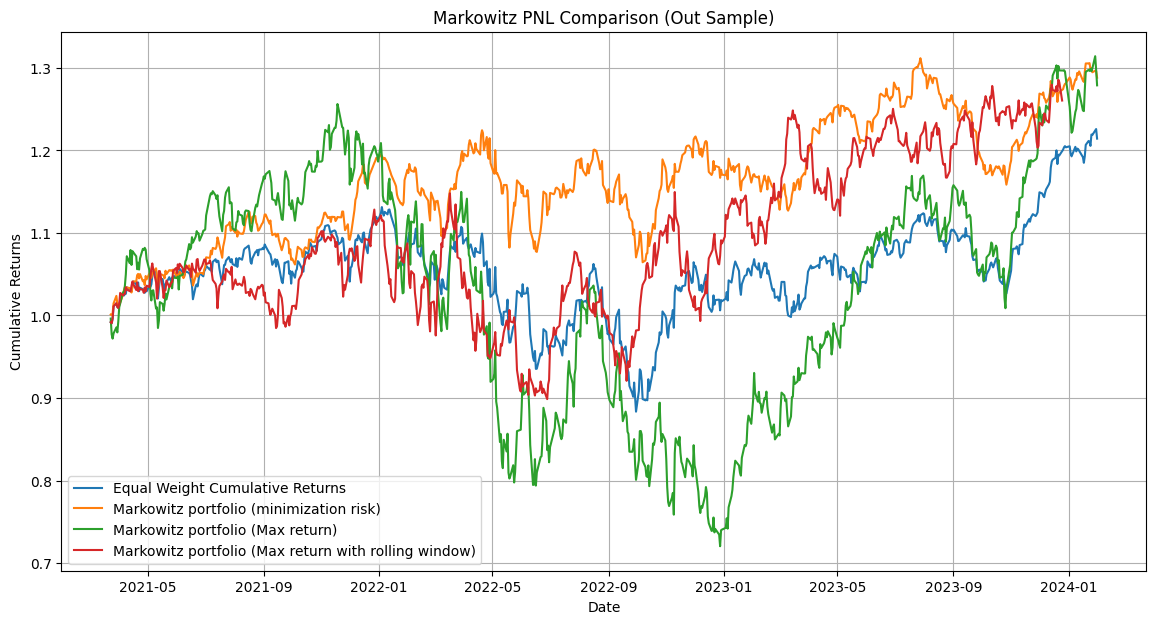

,Portfolio,Mean Annual Return,Std. Annual Return,Sharpe Ratio
0,Equal Weight,0.082678,0.151497,0.281710
1,Markowitz Min Risk,0.101938,0.129843,0.477025
2,Markowitz Max Return,0.132820,0.277992,0.333895
3,Rolling Markowitz Max Return,0.104976,0.194111,0.334734


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'te_returns' is your DataFrame with the returns
# Generate a date range and create the returns DataFrame with dates
dates = pd.date_range(start='2021-03-23', periods=len(te_returns), freq='B')
returns_df = pd.DataFrame(data=te_returns.values, index=dates)

# Initialize the overall cumulative returns series
overall_cumulative_returns = pd.Series(index=returns_df.index, dtype=float)

# Start with an initial cumulative product of 1
last_cumulative_product = 1

# Equal weight
equal_weights = np.array([1 / num_stocks] * num_stocks)  # Equal weights for all assets
equal_weighted_returns = (te_returns * equal_weights).sum(axis=1)
cumulative_equal_weighted_returns = (1 + equal_weighted_returns).cumprod()

# Optimal weights
optimal_weights = w_opt_1
optimal_weighted_returns = (te_returns * optimal_weights).sum(axis=1)
cumulative_optimal_weighted_returns = (1 + optimal_weighted_returns).cumprod()

# Optimal weights2
optimal_weights2 = w_opt_2
optimal_weighted_returns2 = (te_returns * optimal_weights2).sum(axis=1)
cumulative_optimal_weighted_returns2 = (1 + optimal_weighted_returns2).cumprod()

# Initialize the list to collect daily returns for rolling portfolio
rolling_portfolio_daily_returns = []

for i, chunk in enumerate(chunks):
    current_weights = weights_list[i]
    # Calculate daily weighted returns for the current chunk
    weighted_returns = (chunk * current_weights).sum(axis=1)
    rolling_portfolio_daily_returns.extend(weighted_returns)

    # Calculate daily cumulative returns, starting from the last cumulative product
    daily_cumulative_returns = (1 + pd.Series(weighted_returns)).cumprod() * last_cumulative_product

    # Update the last cumulative product for the next chunk
    last_cumulative_product = daily_cumulative_returns.iloc[-1]

    # Assign the daily cumulative returns to the overall cumulative returns series
    start_index = i * chunk_size
    end_index = start_index + chunk_size
    overall_cumulative_returns.iloc[start_index:end_index] = daily_cumulative_returns

# Ensure the series is aligned correctly
overall_cumulative_returns.fillna(method='ffill', inplace=True)

# Plotting the cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(cumulative_equal_weighted_returns, label='Equal Weight Cumulative Returns')
plt.plot(cumulative_optimal_weighted_returns, label='Markowitz portfolio (minimization risk)')
plt.plot(cumulative_optimal_weighted_returns2, label='Markowitz portfolio (Max return)')
plt.plot(overall_cumulative_returns, label='Markowitz portfolio (Max return with rolling window)')

plt.title('Markowitz PNL Comparison (Out Sample)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Annualize metrics calculation function
def annualize_metrics(daily_returns, risk_free_rate):
    mean_daily_return = daily_returns.mean()
    std_daily_return = daily_returns.std()

    mean_annual_return = (1 + mean_daily_return) ** 252 - 1  # 252 trading days per year
    std_annual_return = std_daily_return * np.sqrt(252)

    sharpe_ratio = (mean_annual_return - risk_free_rate) / std_annual_return

    return mean_annual_return, std_annual_return, sharpe_ratio

risk_free_rate = 0.04

# Calculate the metrics for each portfolio using the defined function
ew_metrics = annualize_metrics(equal_weighted_returns, risk_free_rate)
opt1_metrics = annualize_metrics(optimal_weighted_returns, risk_free_rate)
opt2_metrics = annualize_metrics(optimal_weighted_returns2, risk_free_rate)
rolling_metrics = annualize_metrics(pd.Series(rolling_portfolio_daily_returns), risk_free_rate)

import pandas as pd

# Create the DataFrame with portfolio metrics
portfolios_comparison = pd.DataFrame({
    'Portfolio': ['Equal Weight', 'Markowitz Min Risk', 'Markowitz Max Return', 'Rolling Markowitz Max Return'],
    'Mean Annual Return': [ew_metrics[0], opt1_metrics[0], opt2_metrics[0], rolling_metrics[0]],
    'Std. Annual Return': [ew_metrics[1], opt1_metrics[1], opt2_metrics[1], rolling_metrics[1]],
    'Sharpe Ratio': [ew_metrics[2], opt1_metrics[2], opt2_metrics[2], rolling_metrics[2]]
})

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def strike_min(s):
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

# Apply the styling functions to the DataFrame
styled_df = portfolios_comparison.style.apply(highlight_max, subset=['Mean Annual Return', 'Sharpe Ratio']) \
                                       .apply(strike_min, subset=['Std. Annual Return'])

# Display the styled DataFrame
styled_df



## Deep Learning

### End to End
The optimal asset allocation decisions are obtained from raw input
data through a single data-decision pipeline embedded in a fully connected feed forward neural network.


Similar to a reinforcement learning problem,
we train the model based on a portfolio performance metric which we call the risk-reward
function

如何定义： Risk Reward Function

### Helper Functions

In [31]:
import pandas as pd
# 注意：对于没有数据的行，我用了当天的数据来fill na
def calculate_moving_averages(dataframe, days_vector):
    # Create a new DataFrame for storing x day averages
    df_averages = pd.DataFrame(index=dataframe.index)

    # Loop over each column (ticker)
    for ticker in dataframe.columns:
        # Calculate the moving average for each number of days in the vector
        for x_days in days_vector:
            rolling_average = dataframe[ticker].rolling(window=x_days, min_periods=1).mean()
            # Filling NA values with the original day's return
            rolling_average.fillna(dataframe[ticker], inplace=True)
            # Add the average column to the df_averages
            df_averages[f'{x_days} days average for {ticker}'] = rolling_average

    return df_averages

# To calculate the moving averages for a vector of days:
days_vector = [5, 10, 30]
moving_average_df = calculate_moving_averages(tr_returns, days_vector)
print(moving_average_df.shape)
moving_average_df.tail(2)

(3360, 87)


,"5 days average for ('AMZN',)","10 days average for ('AMZN',)","30 days average for ('AMZN',)","5 days average for ('AAPL',)","10 days average for ('AAPL',)","30 days average for ('AAPL',)","5 days average for ('AMGN',)","10 days average for ('AMGN',)","30 days average for ('AMGN',)","5 days average for ('AXP',)",...,"30 days average for ('UNH',)","5 days average for ('VZ',)","10 days average for ('VZ',)","30 days average for ('VZ',)","5 days average for ('WBA',)","10 days average for ('WBA',)","30 days average for ('WBA',)","5 days average for ('WMT',)","10 days average for ('WMT',)","30 days average for ('WMT',)"
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-08,0.001303,0.008833,0.001058,0.019452,0.013488,0.002637,-0.000893,-0.001925,-0.001186,0.002381,...,0.002026,-0.007428,-0.005268,0.000504,-0.009335,-0.003987,-0.002441,-0.003763,-0.000844,-0.000595
2018-05-09,0.004854,0.009808,0.002645,0.012026,0.013757,0.003727,0.000295,-0.002923,-0.000190,0.005833,...,0.001790,-0.005766,-0.007495,-0.000120,-0.002064,-0.004519,-0.001385,-0.007566,-0.004710,-0.001085


In [32]:
import pandas as pd
def calculate_moving_volatilities(dataframe, days_vector):
    # Create a new DataFrame for storing x day volatilities
    df_volatilities = pd.DataFrame(index=dataframe.index)

    # Loop over each column (ticker)
    for ticker in dataframe.columns:
        # Calculate the volatility for each number of days in the vector
        for x_days in days_vector:
            rolling_volatility = dataframe[ticker].rolling(window=x_days, min_periods=1).std()
            # Filling NA values with zeros (since there's no volatility with one observation)
            rolling_volatility.fillna(0, inplace=True)
            # Add the volatility column to the df_volatilities
            df_volatilities[f'{x_days} days volatility for {ticker}'] = rolling_volatility

    return df_volatilities

# To calculate the volatilities for a vector of days:
days_vector = [5, 10, 30]
volatility_df = calculate_moving_volatilities(tr_returns, days_vector)
print(volatility_df.shape)
volatility_df.tail(2)

(3360, 87)


,"5 days volatility for ('AMZN',)","10 days volatility for ('AMZN',)","30 days volatility for ('AMZN',)","5 days volatility for ('AAPL',)","10 days volatility for ('AAPL',)","30 days volatility for ('AAPL',)","5 days volatility for ('AMGN',)","10 days volatility for ('AMGN',)","30 days volatility for ('AMGN',)","5 days volatility for ('AXP',)",...,"30 days volatility for ('UNH',)","5 days volatility for ('VZ',)","10 days volatility for ('VZ',)","30 days volatility for ('VZ',)","5 days volatility for ('WBA',)","10 days volatility for ('WBA',)","30 days volatility for ('WBA',)","5 days volatility for ('WMT',)","10 days volatility for ('WMT',)","30 days volatility for ('WMT',)"
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-08,0.008057,0.016580,0.024168,0.020478,0.017585,0.018524,0.010208,0.014862,0.015258,0.009859,...,0.015010,0.011979,0.021042,0.015902,0.022358,0.018261,0.019357,0.014763,0.012664,0.012959
2018-05-09,0.006769,0.016291,0.023067,0.015366,0.017450,0.017748,0.010795,0.013759,0.014747,0.007284,...,0.015181,0.009855,0.020578,0.016082,0.021027,0.017729,0.019094,0.019258,0.015460,0.013831


In [33]:
merged_df = moving_average_df.join(volatility_df)
X = merged_df
X.head(3)

,"5 days average for ('AMZN',)","10 days average for ('AMZN',)","30 days average for ('AMZN',)","5 days average for ('AAPL',)","10 days average for ('AAPL',)","30 days average for ('AAPL',)","5 days average for ('AMGN',)","10 days average for ('AMGN',)","30 days average for ('AMGN',)","5 days average for ('AXP',)",...,"30 days volatility for ('UNH',)","5 days volatility for ('VZ',)","10 days volatility for ('VZ',)","30 days volatility for ('VZ',)","5 days volatility for ('WBA',)","10 days volatility for ('WBA',)","30 days volatility for ('WBA',)","5 days volatility for ('WMT',)","10 days volatility for ('WMT',)","30 days volatility for ('WMT',)"
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,-0.053459,-0.053459,-0.053459,0.010270,0.010270,0.010270,-0.015868,-0.015868,-0.015868,-0.015025,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-05,-0.031120,-0.031120,-0.031120,0.009514,0.009514,0.009514,-0.015838,-0.015838,-0.015838,-0.012153,...,0.00974,0.006101,0.006101,0.006101,0.023246,0.023246,0.023246,0.002652,0.002652,0.002652
2005-01-06,-0.026492,-0.026492,-0.026492,0.006601,0.006601,0.006601,-0.007453,-0.007453,-0.007453,-0.009816,...,0.01624,0.004806,0.004806,0.004806,0.017199,0.017199,0.017199,0.008761,0.008761,0.008761


In [34]:
te_moving_average = calculate_moving_averages(te_returns, days_vector)
tr_volatility = calculate_moving_volatilities(te_returns, days_vector)
X_test = te_moving_average.join(tr_volatility)
X_test.head(3)

,"5 days average for ('AMZN',)","10 days average for ('AMZN',)","30 days average for ('AMZN',)","5 days average for ('AAPL',)","10 days average for ('AAPL',)","30 days average for ('AAPL',)","5 days average for ('AMGN',)","10 days average for ('AMGN',)","30 days average for ('AMGN',)","5 days average for ('AXP',)",...,"30 days volatility for ('UNH',)","5 days volatility for ('VZ',)","10 days volatility for ('VZ',)","30 days volatility for ('VZ',)","5 days volatility for ('WBA',)","10 days volatility for ('WBA',)","30 days volatility for ('WBA',)","5 days volatility for ('WMT',)","10 days volatility for ('WMT',)","30 days volatility for ('WMT',)"
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-23,0.008560,0.008560,0.008560,-0.006889,-0.006889,-0.006889,-0.018623,-0.018623,-0.018623,-0.027652,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-03-24,-0.003757,-0.003757,-0.003757,-0.013441,-0.013441,-0.013441,-0.008434,-0.008434,-0.008434,-0.005228,...,0.000868,0.002756,0.002756,0.002756,0.010982,0.010982,0.010982,0.012769,0.012769,0.012769
2021-03-25,-0.006911,-0.006911,-0.006911,-0.007573,-0.007573,-0.007573,-0.004564,-0.004564,-0.004564,0.005810,...,0.002257,0.002526,0.002526,0.002526,0.010112,0.010112,0.010112,0.009310,0.009310,0.009310


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

cov_matrix  = np.cov(tr_returns,rowvar=False)
cov_matrix = tf.constant(np.array(cov_matrix), dtype=tf.float32)

historical_returns_mean = tr_returns.mean(axis = 0)
# Convert the mean historical returns to a tensor
expected_returns = tf.convert_to_tensor(historical_returns_mean, dtype=tf.float32)
expected_returns.shape

TensorShape([29])

Loss Functiond definition:

In [36]:
# Define the custom loss function
def portfolio_variance_loss(y_true, y_pred):
    # We calculate the portfolio variance using the predicted weights and the covariance matrix
    portfolio_variance = tf.matmul(tf.matmul(y_pred, cov_matrix), tf.transpose(y_pred))
    penalty_mask = tf.greater(y_pred, 0.2)
    penalties = tf.where(penalty_mask, y_pred - 0.2, tf.zeros_like(y_pred))
    penalty = tf.reduce_sum(penalties, axis=-1)
    return portfolio_variance
    #return portfolio_variance + penalty


def maximize_cumulative_returns_loss(y_true, y_pred):
    portfolio_return = tf.reduce_sum(tf.multiply(expected_returns, y_pred), axis=1)
    loss = -tf.reduce_mean(portfolio_return)
    penalty_mask = tf.greater(y_pred, 0.4)
    penalties = tf.where(penalty_mask, y_pred - 0.0001, tf.zeros_like(y_pred))
    penalty = tf.reduce_sum(penalties, axis=-1)
    return loss + penalty

def negative_share(y_true, y_pred):
    portfolio_return = tf.reduce_sum(tf.multiply(expected_returns, y_pred), axis=1)
    portfolio_variance = tf.matmul(tf.matmul(y_pred, cov_matrix), tf.transpose(y_pred))

    penalty_mask = tf.greater(y_pred, 0.35)
    penalties = tf.where(penalty_mask, y_pred - 0.35, tf.zeros_like(y_pred))
    penalty = tf.reduce_sum(penalties, axis=-1)
    portfolio_volatility = tf.sqrt(tf.linalg.diag_part(portfolio_variance))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    negative_sharpe_ratio = -sharpe_ratio
    return negative_sharpe_ratio



In [37]:
X_train = tf.convert_to_tensor(X, dtype=tf.float32)
X_train.shape

TensorShape([3360, 174])

In [38]:
import tensorflow as tf
from tensorflow.keras.initializers import Initializer

class FixedValueInitializer(Initializer):
    def __init__(self, value=0.01):
        self.value = value

    def __call__(self, shape, dtype=None):
        return tf.fill(shape, self.value)

# Example usage in a layer
# Initialize weights to 0.01
initializer = FixedValueInitializer(1/num_stocks)

In [39]:
# Define the model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2

# Define the L2 regularization factor
l2_reg = 0.001 # adjustable

model = Sequential([
    Input(shape=(num_stocks * 6,)),
    Dense(128, activation='relu', kernel_regularizer=l2(l2_reg),kernel_initializer=initializer),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(l2_reg)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(l2_reg)),
    Dropout(0.2),
    Dense(num_stocks, activation='softmax')  # Apply L2 regularization to output layer as well
])


# Compile the model with the custom loss function
model.compile(optimizer=Adam(learning_rate= 0.001), loss=maximize_cumulative_returns_loss)

X_train = tf.convert_to_tensor(X, dtype=tf.float32)
y_train = tf.ones((len(X_train), num_stocks))

# Train the model
model.fit(X_train, y_train, epochs= 10)

Epoch 1/10
105/105 [==============================] - 2s 4ms/step - loss: 0.0637
Epoch 2/10
105/105 [==============================] - 0s 4ms/step - loss: 0.0086
Epoch 3/10
105/105 [==============================] - 0s 4ms/step - loss: 3.8873e-04
Epoch 4/10
105/105 [==============================] - 0s 4ms/step - loss: -7.9171e-04
Epoch 5/10
105/105 [==============================] - 0s 4ms/step - loss: -0.0011
Epoch 6/10
105/105 [==============================] - 0s 4ms/step - loss: -0.0010
Epoch 7/10
105/105 [==============================] - 0s 4ms/step - loss: -0.0012
Epoch 8/10
105/105 [==============================] - 0s 4ms/step - loss: -9.2814e-04
Epoch 9/10
105/105 [==============================] - 0s 4ms/step - loss: -9.3837e-04
Epoch 10/10
105/105 [==============================] - 0s 4ms/step - loss: -0.0012


In [44]:
portfolio_weights = model.predict(X_train)
w_opt_3 = portfolio_weights.mean(axis = 0)
w_opt_3.round(2)

105/105 [==============================] - 0s 2ms/step


array([0.32, 0.31, 0.  , 0.  , 0.01, 0.  , 0.3 , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ], dtype=float32)

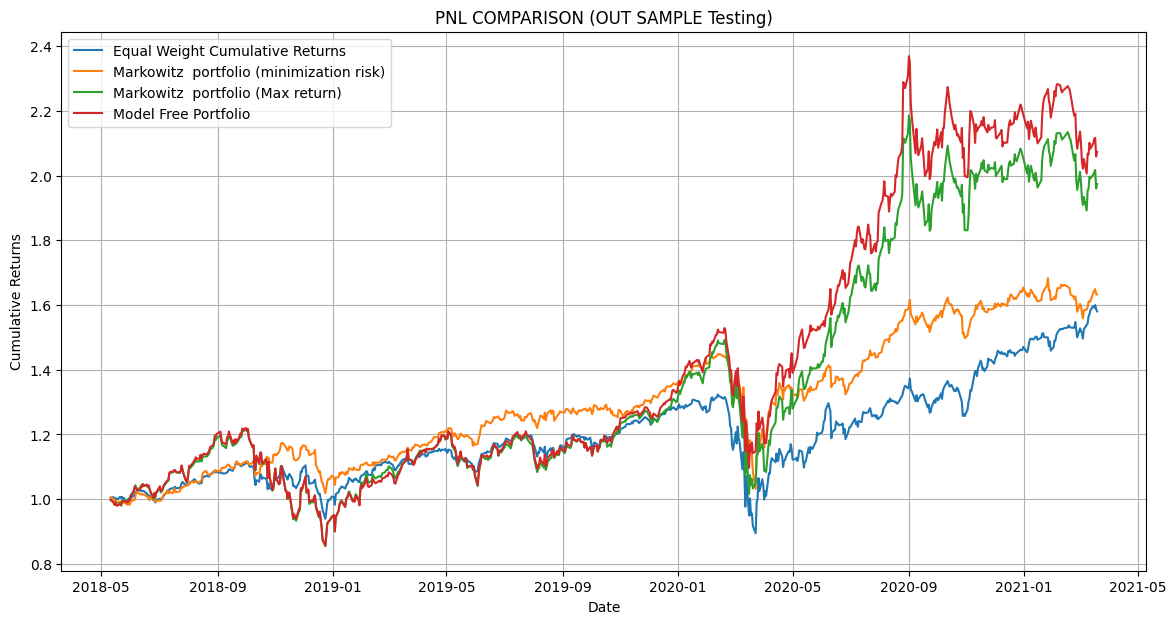

NameError: name 'opt3_metrics' is not defined

In [46]:
# Assuming the returns dataframe is provided in a similar format as in the screenshot
returns_data = tr_returns

dates = pd.date_range(start='2005, 1, 1', periods=len(returns_data['AAPL']), freq='B')
returns_df = pd.DataFrame(data=returns_data, index=dates)

# Equal weight
equal_weights = np.array([1/num_stocks] * num_stocks) # Equal weights for 5 assets
equal_weighted_returns = (val_returns * equal_weights).sum(axis=1)
cumulative_equal_weighted_returns = (1 + equal_weighted_returns).cumprod()

# Optimal weights
optimal_weights = w_opt_1
optimal_weighted_returns = (val_returns * optimal_weights).sum(axis=1)
cumulative_optimal_weighted_returns = (1 + optimal_weighted_returns).cumprod()


# Optimal weights2
optimal_weights2 = w_opt_2
optimal_weighted_returns2 = (val_returns * optimal_weights2).sum(axis=1)
cumulative_optimal_weighted_returns2 = (1 + optimal_weighted_returns2).cumprod()



# Optimal weights3
optimal_weights3 = w_opt_3
optimal_weighted_returns3 = (val_returns * optimal_weights3).sum(axis=1)
cumulative_optimal_weighted_returns3 = (1 + optimal_weighted_returns3).cumprod()


# Plotting the cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(cumulative_equal_weighted_returns, label='Equal Weight Cumulative Returns')
plt.plot(cumulative_optimal_weighted_returns, label='Markowitz  portfolio (minimization risk)')
plt.plot(cumulative_optimal_weighted_returns2, label='Markowitz  portfolio (Max return)')
plt.plot(cumulative_optimal_weighted_returns3, label='Model Free Portfolio')


plt.title('PNL COMPARISON (OUT SAMPLE Testing)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

portfolios_comparison = pd.DataFrame({
    'Portfolio': ['Equal Weight', 'Markowitz Min Risk', 'Markowitz Max Return', 'DL Portfolio'],
    'Mean Annual Return': [ew_metrics[0], opt1_metrics[0], opt2_metrics[0], opt3_metrics[0]],
    'Std. Annual Return': [ew_metrics[1], opt1_metrics[1], opt2_metrics[1], opt3_metrics[1]],
    'Sharpe Ratio': [ew_metrics[2], opt1_metrics[2], opt2_metrics[2], opt3_metrics[2]],
    'Max Drawdown': [ew_max_drawdown, opt1_max_drawdown, opt2_max_drawdown, opt3_max_drawdown]
})


styled_df = portfolios_comparison.style.apply(highlight_max, subset=['Mean Annual Return', 'Sharpe Ratio',"Max Drawdown"]) \
                                       .apply(strike_min, subset=['Std. Annual Return'])

# Display the styled DataFrame
styled_df


In [47]:
import pandas as pd
import numpy as np

# Assuming the following variables are defined:
# - risk_free_rate: The risk-free rate for Sharpe ratio calculation.
# - equal_weighted_returns: Daily returns for the equal weight portfolio.
# - optimal_weighted_returns: Daily returns for the first optimized portfolio.
# - optimal_weighted_returns2: Daily returns for the second optimized portfolio.
# - optimal_weighted_returns3: Daily returns for the third optimized portfolio (DL portfolio).

# Function to calculate annualized metrics
def annualize_metrics(daily_returns, risk_free_rate, trading_days=252):
    mean_daily_return = np.mean(daily_returns)
    std_daily_return = np.std(daily_returns)

    mean_annual_return = (1 + mean_daily_return) ** trading_days - 1
    std_annual_return = std_daily_return * np.sqrt(trading_days)

    sharpe_ratio = (mean_annual_return - risk_free_rate) / std_annual_return

    return mean_annual_return, std_annual_return, sharpe_ratio

# Function to calculate the maximum drawdown
def calculate_max_drawdown(cumulative_returns):
    # Calculate the running maximum
    running_max = np.maximum.accumulate(cumulative_returns)
    # Calculate the drawdown as the difference from the running max
    drawdown = (cumulative_returns - running_max) / running_max
    # Calculate the max drawdown
    max_drawdown = drawdown.min()
    return max_drawdown

# Calculate the metrics for each portfolio
ew_metrics = annualize_metrics(equal_weighted_returns, risk_free_rate)
opt1_metrics = annualize_metrics(optimal_weighted_returns, risk_free_rate)
opt2_metrics = annualize_metrics(optimal_weighted_returns2, risk_free_rate)
opt3_metrics = annualize_metrics(optimal_weighted_returns3, risk_free_rate)

# Calculate the max drawdown for each portfolio
ew_max_drawdown = calculate_max_drawdown(cumulative_equal_weighted_returns)
opt1_max_drawdown = calculate_max_drawdown(cumulative_optimal_weighted_returns)
opt2_max_drawdown = calculate_max_drawdown(cumulative_optimal_weighted_returns2)
opt3_max_drawdown = calculate_max_drawdown(cumulative_optimal_weighted_returns3)

# Create a DataFrame to hold the results
portfolios_comparison = pd.DataFrame({
    'Portfolio': ['Equal Weight', 'Markowitz Min Risk', 'Markowitz Max Return', 'DL Portfolio'],
    'Mean Annual Return': [ew_metrics[0], opt1_metrics[0], opt2_metrics[0], opt3_metrics[0]],
    'Std. Annual Return': [ew_metrics[1], opt1_metrics[1], opt2_metrics[1], opt3_metrics[1]],
    'Sharpe Ratio': [ew_metrics[2], opt1_metrics[2], opt2_metrics[2], opt3_metrics[2]],
    'Max Drawdown': [ew_max_drawdown, opt1_max_drawdown, opt2_max_drawdown, opt3_max_drawdown]
})

portfolios_comparison

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def strike_min(s):
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

# Apply the styling functions to the DataFrame
styled_df = portfolios_comparison.style.apply(highlight_max, subset=['Mean Annual Return', 'Sharpe Ratio',"Max Drawdown"]) \
                                       .apply(strike_min, subset=['Std. Annual Return'])

# Display the styled DataFrame
styled_df


,Portfolio,Mean Annual Return,Std. Annual Return,Sharpe Ratio,Max Drawdown
0,Equal Weight,0.206808,0.234388,0.711675,-0.323842
1,Markowitz Min Risk,0.211663,0.200597,0.855759,-0.287744
2,Markowitz Max Return,0.332350,0.311223,0.939360,-0.319150
3,DL Portfolio,0.352838,0.305320,1.024624,-0.297872


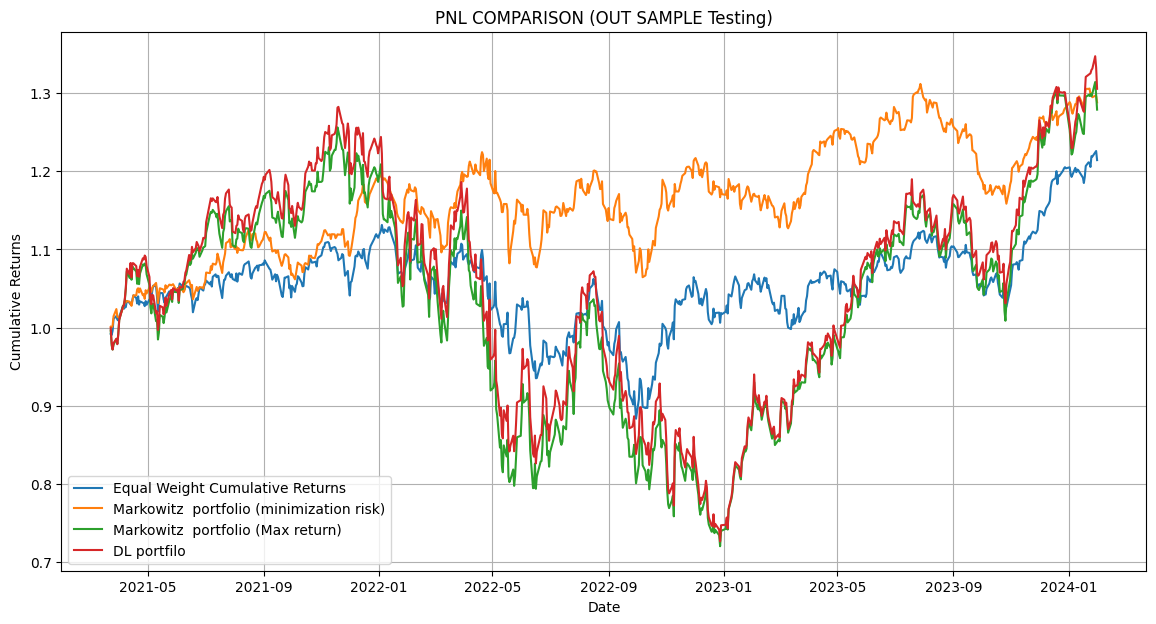

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming the returns dataframe is provided in a similar format as in the screenshot
returns_data = tr_returns

dates = pd.date_range(start='2005, 1, 1', periods=len(returns_data['AAPL']), freq='B')
returns_df = pd.DataFrame(data=returns_data, index=dates)

# Equal weight
equal_weights = np.array([1/num_stocks] * num_stocks) # Equal weights for 5 assets
equal_weighted_returns = (te_returns * equal_weights).sum(axis=1)
cumulative_equal_weighted_returns = (1 + equal_weighted_returns).cumprod()

# Optimal weights
optimal_weights = w_opt_1
optimal_weighted_returns = (te_returns * optimal_weights).sum(axis=1)
cumulative_optimal_weighted_returns = (1 + optimal_weighted_returns).cumprod()


# Optimal weights2
optimal_weights2 = w_opt_2
optimal_weighted_returns2 = (te_returns * optimal_weights2).sum(axis=1)
cumulative_optimal_weighted_returns2 = (1 + optimal_weighted_returns2).cumprod()



# Optimal weights3
optimal_weights3 = w_opt_3
optimal_weighted_returns3 = (te_returns * optimal_weights3).sum(axis=1)
cumulative_optimal_weighted_returns3 = (1 + optimal_weighted_returns3).cumprod()


# Plotting the cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(cumulative_equal_weighted_returns, label='Equal Weight Cumulative Returns')
plt.plot(cumulative_optimal_weighted_returns, label='Markowitz  portfolio (minimization risk)')
plt.plot(cumulative_optimal_weighted_returns2, label='Markowitz  portfolio (Max return)')
plt.plot(cumulative_optimal_weighted_returns3, label='DL portfilo')


plt.title('PNL COMPARISON (OUT SAMPLE Testing)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()




In [49]:
import pandas as pd
import numpy as np

# Calculate the metrics for each portfolio
ew_metrics = annualize_metrics(equal_weighted_returns, risk_free_rate)
opt1_metrics = annualize_metrics(optimal_weighted_returns, risk_free_rate)
opt2_metrics = annualize_metrics(optimal_weighted_returns2, risk_free_rate)
opt3_metrics = annualize_metrics(optimal_weighted_returns3, risk_free_rate)

# Calculate the max drawdown for each portfolio
ew_max_drawdown = calculate_max_drawdown(cumulative_equal_weighted_returns)
opt1_max_drawdown = calculate_max_drawdown(cumulative_optimal_weighted_returns)
opt2_max_drawdown = calculate_max_drawdown(cumulative_optimal_weighted_returns2)
opt3_max_drawdown = calculate_max_drawdown(cumulative_optimal_weighted_returns3)

# Create a DataFrame to hold the results
portfolios_comparison = pd.DataFrame({
    'Portfolio': ['Equal Weight', 'Markowitz Min Risk', 'Markowitz Max Return', 'DL Portfolio'],
    'Mean Annual Return': [ew_metrics[0], opt1_metrics[0], opt2_metrics[0], opt3_metrics[0]],
    'Std. Annual Return': [ew_metrics[1], opt1_metrics[1], opt2_metrics[1], opt3_metrics[1]],
    'Sharpe Ratio': [ew_metrics[2], opt1_metrics[2], opt2_metrics[2], opt3_metrics[2]],
    'Max Drawdown': [ew_max_drawdown, opt1_max_drawdown, opt2_max_drawdown, opt3_max_drawdown]
})



styled_df = portfolios_comparison.style.apply(highlight_max, subset=['Mean Annual Return', 'Sharpe Ratio',"Max Drawdown"]) \
                                       .apply(strike_min, subset=['Std. Annual Return'])

# Display the styled DataFrame
styled_df


,Portfolio,Mean Annual Return,Std. Annual Return,Sharpe Ratio,Max Drawdown
0,Equal Weight,0.082678,0.151392,0.281906,-0.219139
1,Markowitz Min Risk,0.101938,0.129752,0.477357,-0.130673
2,Markowitz Max Return,0.132820,0.277798,0.334127,-0.426580
3,DL Portfolio,0.140807,0.277178,0.363691,-0.433391


### DL Model 2

In [50]:
X
# Split DataFrame into chunks
chunk_size = 30  # size of each chunk
chunks = [X.iloc[i:i + chunk_size] for i in range(0, len(tr_returns), chunk_size)]


In [51]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Define constants
num_stocks = 29
chunk_size = 30  # 30 days intervals
l2_reg = 0.0001  # L2 regularization factor

# Divide data into 30-day intervals
chunks = [X.iloc[i:i + chunk_size] for i in range(0, len(X), chunk_size)]

# Convert chunks into numpy arrays
X_chunks = [chunk.values for chunk in chunks]
X_chunks = np.array(X_chunks)

# Define the model architecture
model = Sequential([
    Input(shape=(chunk_size, num_stocks * 6)),
    LSTM(64, activation='relu', kernel_regularizer=l2(l2_reg)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(l2_reg)),
    Dropout(0.2),
    Dense(num_stocks, activation='softmax', kernel_regularizer=l2(l2_reg))  # Apply L2 regularization to output layer as well
])

model.compile(optimizer=Adam(learning_rate=0.005), loss=maximize_cumulative_returns_loss)

# Prepare the data for training
X_train = tf.convert_to_tensor(X_chunks, dtype=tf.float32)
y_train = tf.ones((X_train.shape[0], num_stocks))

# Train the model
model.fit(X_train, y_train, epochs=20)


Epoch 1/20
4/4 [==============================] - 2s 20ms/step - loss: 0.0246
Epoch 2/20
4/4 [==============================] - 0s 23ms/step - loss: 0.0159
Epoch 3/20
4/4 [==============================] - 0s 20ms/step - loss: 0.0097
Epoch 4/20
4/4 [==============================] - 0s 20ms/step - loss: 0.0056
Epoch 5/20
4/4 [==============================] - 0s 22ms/step - loss: 0.0032
Epoch 6/20
4/4 [==============================] - 0s 22ms/step - loss: 0.0018
Epoch 7/20
4/4 [==============================] - 0s 21ms/step - loss: 0.0011
Epoch 8/20
4/4 [==============================] - 0s 21ms/step - loss: 6.7044e-04
Epoch 9/20
4/4 [==============================] - 0s 22ms/step - loss: 3.5262e-04
Epoch 10/20
4/4 [==============================] - 0s 21ms/step - loss: 0.1727
Epoch 11/20
4/4 [==============================] - 0s 20ms/step - loss: 3.0284e-04
Epoch 12/20
4/4 [==============================] - 0s 20ms/step - loss: 4.7334e-04
Epoch 13/20
4/4 [============================

In [79]:
chunks = [X_test.iloc[i:i + chunk_size] for i in range(0, len(X_test), chunk_size)]
X_chunks = [chunk.values for chunk in chunks]
X_chunks = np.array(X_chunks)
x_test = tf.convert_to_tensor(X_chunks, dtype=tf.float32)

portfolio_weights = model.predict(x_test)
LSTM_weights = portfolio_weights



1/1 [==============================] - 0s 47ms/step


In [81]:



te_chunks_returns =

,"5 days average for ('AMZN',)","10 days average for ('AMZN',)","30 days average for ('AMZN',)","5 days average for ('AAPL',)","10 days average for ('AAPL',)","30 days average for ('AAPL',)","5 days average for ('AMGN',)","10 days average for ('AMGN',)","30 days average for ('AMGN',)","5 days average for ('AXP',)",...,"30 days volatility for ('UNH',)","5 days volatility for ('VZ',)","10 days volatility for ('VZ',)","30 days volatility for ('VZ',)","5 days volatility for ('WBA',)","10 days volatility for ('WBA',)","30 days volatility for ('WBA',)","5 days volatility for ('WMT',)","10 days volatility for ('WMT',)","30 days volatility for ('WMT',)"
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-05,-0.011054,-0.002653,0.001475,-0.008219,-0.004024,0.001583,0.010524,-0.003363,0.000735,0.005034,...,0.012498,0.006108,0.009617,0.007539,0.009314,0.012937,0.014220,0.010402,0.009751,0.008492
2021-05-06,-0.009604,0.000019,0.002376,-0.005509,-0.001575,0.002676,0.013778,-0.001139,0.000938,0.002921,...,0.012499,0.004650,0.008207,0.007709,0.010003,0.008484,0.014173,0.009510,0.009254,0.008415
2021-05-07,-0.010273,-0.001390,0.002668,-0.001417,-0.002847,0.002715,0.011893,-0.000758,0.001218,0.007253,...,0.012499,0.008517,0.009178,0.007921,0.010259,0.008332,0.014161,0.010330,0.009546,0.008494
2021-05-10,-0.011749,-0.006501,0.001581,-0.008221,-0.005725,0.001683,0.005852,-0.000796,0.000114,0.004985,...,0.012363,0.009636,0.009223,0.007903,0.005552,0.008100,0.014231,0.007058,0.008017,0.008418
2021-05-11,-0.005247,-0.005701,0.001671,-0.002626,-0.006221,0.001387,0.003985,-0.000770,-0.000205,-0.000023,...,0.013199,0.012805,0.010354,0.008295,0.010058,0.010068,0.014345,0.006804,0.008789,0.008419
2021-05-12,-0.007216,-0.009135,0.001148,-0.008005,-0.008112,0.000965,0.001210,0.005867,0.000282,-0.005189,...,0.013240,0.012793,0.010525,0.008269,0.013384,0.012863,0.014946,0.013087,0.012287,0.009647
2021-05-13,-0.008802,-0.009203,0.000826,-0.006981,-0.006245,0.000937,0.000635,0.007207,0.000572,-0.003478,...,0.013207,0.012132,0.009717,0.008218,0.017875,0.014221,0.013886,0.015938,0.012876,0.010118
2021-05-14,-0.004023,-0.007148,0.000753,-0.004078,-0.002747,0.001366,-0.000826,0.005534,0.000667,-0.002170,...,0.012828,0.011321,0.009601,0.008226,0.018639,0.014387,0.014019,0.016870,0.013234,0.010224
2021-05-17,0.005068,-0.003340,0.000551,-0.000769,-0.004495,0.000272,0.001221,0.003536,0.000418,-0.002162,...,0.012851,0.009331,0.010610,0.008388,0.018658,0.013027,0.012309,0.016643,0.012082,0.008907


In [106]:
len(LSTM_weights)

24

In [107]:
chunk

,AMZN,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-18,0.027339,-0.008503,0.000109,0.012465,-0.014606,-0.000105,0.007607,0.007419,0.002209,-0.006420,...,-0.010376,0.008848,0.005179,-0.003373,0.015351,0.003282,-0.008604,0.008028,-0.008730,0.014600
2023-12-19,-0.001817,0.005360,0.010745,0.016360,0.011904,0.025375,0.002845,-0.001194,0.013095,0.011523,...,0.003589,0.004244,0.001637,0.012382,0.000000,0.015103,-0.004767,-0.002655,0.042034,0.003614
2023-12-20,-0.010859,-0.010714,-0.011708,-0.027456,-0.012371,-0.011094,-0.015472,-0.007573,-0.009166,-0.028319,...,-0.024282,-0.010611,-0.007073,-0.009866,-0.015461,-0.012568,-0.015476,-0.007187,-0.024203,-0.011702
2023-12-21,0.011307,-0.000770,0.015081,0.022917,0.006801,0.001243,0.026897,-0.002008,0.003062,0.008217,...,0.018231,0.009776,0.007879,0.009059,0.002432,0.009410,0.007656,0.003485,0.025984,0.007091
2023-12-22,-0.002730,-0.005547,0.017291,0.004221,-0.006030,0.001000,-0.003405,0.007847,0.002256,-0.010867,...,0.007294,0.012313,0.002784,-0.118257,0.007070,0.001239,0.000827,0.001603,0.006140,0.011951
2023-12-26,-0.000065,-0.002841,-0.000915,0.002102,0.009023,0.018150,-0.000450,0.003793,0.009004,-0.000769,...,0.016740,-0.000650,0.000214,-0.000185,0.004543,0.006943,-0.000538,-0.000267,0.014874,-0.001532
2023-12-27,-0.000456,0.000518,0.009264,0.005915,-0.002626,0.008423,0.001878,0.003182,-0.003281,-0.006267,...,0.005827,0.003252,-0.001575,-0.008239,0.000822,0.008178,0.005307,-0.004536,0.001127,0.009398
2023-12-28,0.000261,0.002226,0.006736,0.003956,-0.006677,-0.004159,-0.004274,0.000793,-0.014087,0.000221,...,0.008736,0.007316,0.003235,0.015775,-0.002259,0.003764,0.004036,0.004824,-0.001501,-0.001963
2023-12-29,-0.009388,-0.005424,-0.001525,-0.002450,0.001191,-0.004076,-0.009187,0.000792,-0.004073,-0.001217,...,-0.003373,0.002298,0.002025,-0.002297,0.005558,0.006127,0.002991,0.005601,-0.018421,0.000508


In [100]:
chunk_size = 30
num_stocks = returns_df.shape[1]
chunks = [te_returns.iloc[i:i + chunk_size] for i in range(0, len(returns_df), chunk_size)]

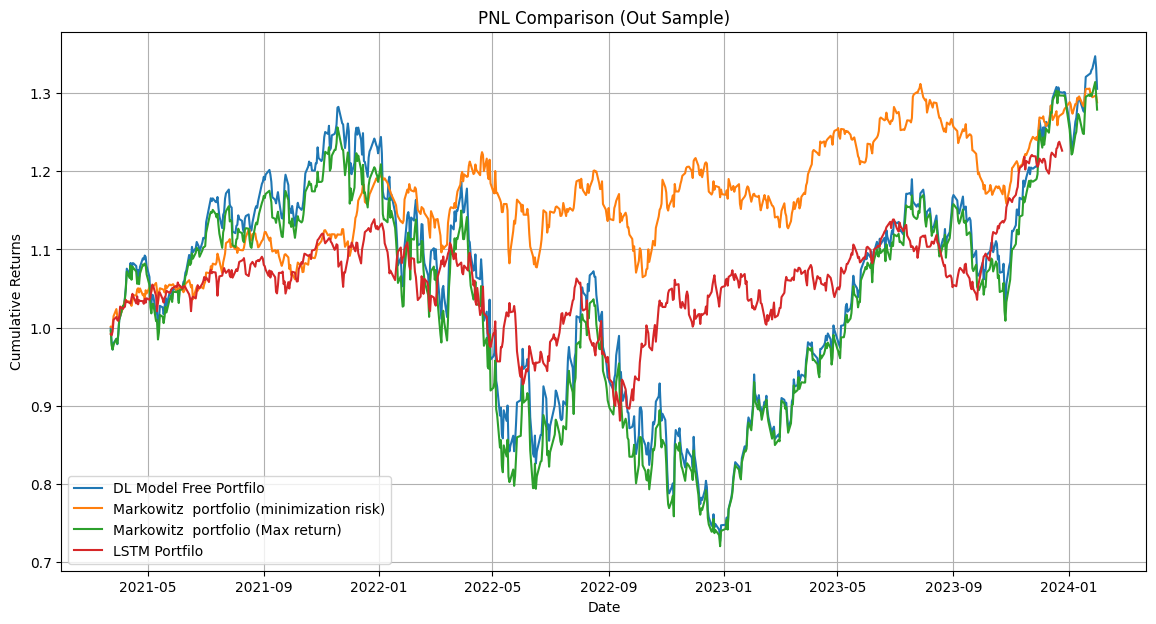

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'te_returns' is your DataFrame with the returns
# Generate a date range and create the returns DataFrame with dates
dates = pd.date_range(start='2021-03-23', periods=len(te_returns), freq='B')
returns_df = pd.DataFrame(data=te_returns.values, index=dates)

# Initialize the overall cumulative returns series
overall_cumulative_returns = pd.Series(index=returns_df.index, dtype=float)

# Start with an initial cumulative product of 1
last_cumulative_product = 1



equal_weights = w_opt_3 # Equal weights for 5 assets
equal_weighted_returns = (te_returns * equal_weights).sum(axis=1)
cumulative_equal_weighted_returns = (1 + equal_weighted_returns).cumprod()

# Optimal weights
optimal_weights = w_opt_1
optimal_weighted_returns = (te_returns * optimal_weights).sum(axis=1)
cumulative_optimal_weighted_returns = (1 + optimal_weighted_returns).cumprod()


# Optimal weights2
optimal_weights2 = w_opt_2
optimal_weighted_returns2 = (te_returns * optimal_weights2).sum(axis=1)
cumulative_optimal_weighted_returns2 = (1 + optimal_weighted_returns2).cumprod()




for i, chunk in enumerate(chunks):
    current_weights = LSTM_weights[i]
    # Calculate daily weighted returns for the current chunk
    weighted_returns = (chunk * current_weights).sum(axis=1)
    # Calculate daily cumulative returns, starting from the last cumulative product
    daily_cumulative_returns = (1 + weighted_returns).cumprod() * last_cumulative_product

    # Update the last cumulative product for the next chunk
    last_cumulative_product = daily_cumulative_returns.iloc[-1]

    # Assign the daily cumulative returns to the overall cumulative returns series
    start_index = i * chunk_size
    end_index = start_index + chunk_size
    overall_cumulative_returns.iloc[start_index:end_index] = daily_cumulative_returns

# Plotting the cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(cumulative_equal_weighted_returns, label='DL Model Free Portfilo')
plt.plot(cumulative_optimal_weighted_returns, label='Markowitz  portfolio (minimization risk)')
plt.plot(cumulative_optimal_weighted_returns2, label='Markowitz  portfolio (Max return)')
plt.plot(overall_cumulative_returns, label='LSTM Portfilo')

plt.title('PNL Comparison (Out Sample)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


## Model Based Approch:

In [56]:
!pip install cvxpy cvxpylayers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 17.1 MB/s eta 0:00:00


In [129]:
cov_matrix

,AMZN,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT
AMZN,0.000532,0.000133,0.000160,0.000194,0.000252,0.000294,0.000254,0.000326,0.000211,0.000117,...,0.000238,0.000049,0.000279,0.000225,0.000053,0.000137,0.000119,0.000089,0.000077,0.000080
AAPL,0.000133,0.000315,0.000084,-0.000004,0.000086,0.000164,0.000143,0.000115,0.000068,0.000107,...,0.000146,0.000018,0.000103,0.000082,0.000071,0.000035,0.000045,-0.000022,0.000055,0.000040
AMGN,0.000160,0.000084,0.000217,0.000039,0.000119,0.000126,0.000087,0.000118,0.000096,0.000089,...,0.000115,0.000112,0.000135,0.000140,0.000066,0.000094,0.000087,0.000116,0.000163,0.000059
AXP,0.000194,-0.000004,0.000039,0.000331,0.000115,0.000126,0.000092,0.000121,0.000072,0.000034,...,0.000119,0.000057,0.000122,0.000091,-0.000016,0.000102,0.000049,0.000050,0.000060,0.000088
BA,0.000252,0.000086,0.000119,0.000115,0.000413,0.000288,0.000165,0.000232,0.000140,0.000119,...,0.000217,0.000059,0.000185,0.000124,0.000062,0.000123,0.000108,0.000119,0.000053,0.000051
CAT,0.000294,0.000164,0.000126,0.000126,0.000288,0.000356,0.000207,0.000225,0.000145,0.000110,...,0.000285,0.000073,0.000204,0.000112,0.000061,0.000142,0.000056,0.000020,0.000059,0.000030
CRM,0.000254,0.000143,0.000087,0.000092,0.000165,0.000207,0.000257,0.000193,0.000086,0.000079,...,0.000194,0.000025,0.000196,0.000099,0.000048,0.000086,0.000072,-0.000011,0.000022,0.000040
CSCO,0.000326,0.000115,0.000118,0.000121,0.000232,0.000225,0.000193,0.000299,0.000147,0.000119,...,0.000193,0.000082,0.000229,0.000164,0.000074,0.000114,0.000080,0.000110,0.000071,0.000083
CVX,0.000211,0.000068,0.000096,0.000072,0.000140,0.000145,0.000086,0.000147,0.000170,0.000033,...,0.000108,0.000050,0.000114,0.000094,0.000039,0.000052,0.000039,0.000068,0.000030,0.000023
DIS,0.000117,0.000107,0.000089,0.000034,0.000119,0.000110,0.000079,0.000119,0.000033,0.000147,...,0.000097,0.000003,0.000077,0.000105,0.000033,0.000051,0.000051,0.000045,0.000044,0.000089


In [136]:
import cvxpy as cp
import tensorflow as tf
from cvxpylayers.tensorflow import CvxpyLayer

# Parameters
n_stocks = num_stocks  # Number of stocks
weights = cp.Variable(n_stocks)
expected_returns = cp.Parameter(n_stocks)

# Objective: Maximize returns
objective = cp.Maximize(weights @ expected_returns)

# Constraints
constraints = [0 <= weights, weights <= 0.3, weights @ corr @ weights.T <= 0.3, cp.sum(weights) <= 1]

problem = cp.Problem(objective, constraints)
cvxpy_layer = CvxpyLayer(problem, parameters=[expected_returns], variables=[weights])

# Example data for expected returns
expected_returns_tensor = tf.Variable(historical_returns_mean, dtype=tf.float32)

with tf.GradientTape() as tape:
    tape.watch(expected_returns_tensor)
    convexopt_portfolio_weights, = cvxpy_layer(expected_returns_tensor)

gradients = tape.gradient(convexopt_portfolio_weights, [expected_returns_tensor])

# Print outputs
print("Optimal Portfolio Weights:", convexopt_portfolio_weights.numpy())
# print("Gradients:", gradients)


Optimal Portfolio Weights: [2.30023766e-01 2.27720187e-01 1.31396203e-06 2.03410955e-06
 1.84994878e-06 2.08192530e-06 2.37802076e-01 2.25353309e-06
 1.87692207e-06 2.15204833e-06 2.02638326e-06 2.04225940e-06
 2.26096026e-06 2.09163145e-06 2.22092951e-06 1.47633356e-06
 1.88597149e-06 1.41533097e-06 1.58348927e-06 2.06365988e-06
 1.19028559e-06 2.24825457e-06 1.85777506e-06 1.30478544e-06
 1.77096019e-06 2.14702735e-02 1.61258866e-06 1.30697331e-06
 1.11693196e-06]


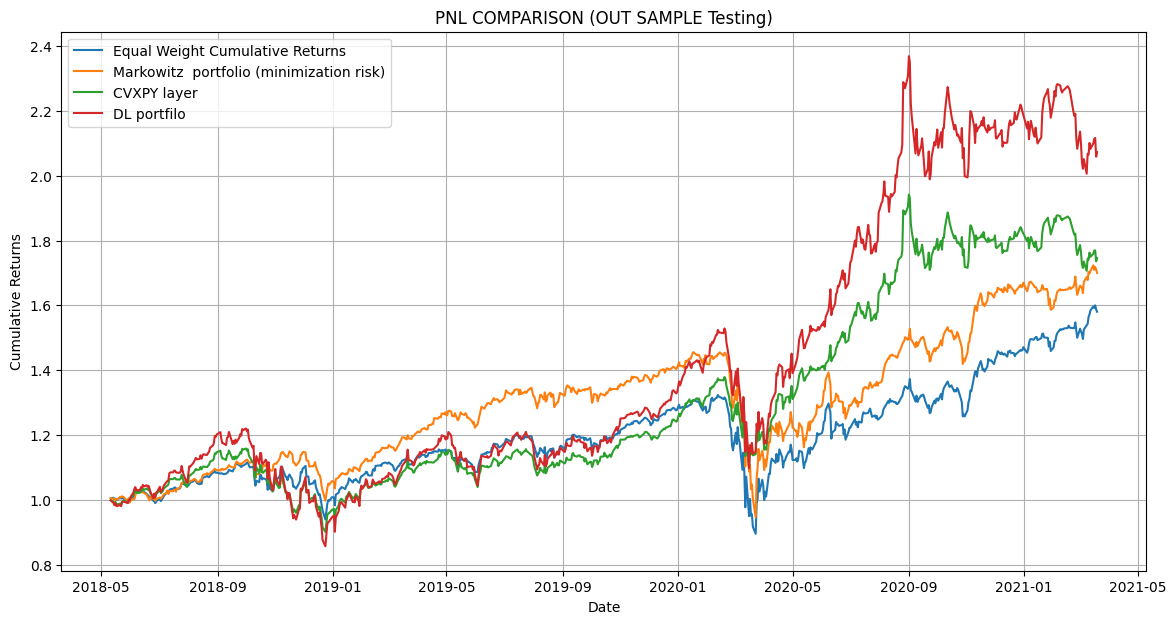

In [137]:
# Assuming the returns dataframe is provided in a similar format as in the screenshot
returns_data = tr_returns

dates = pd.date_range(start='2005, 1, 1', periods=len(returns_data['AAPL']), freq='B')
returns_df = pd.DataFrame(data=returns_data, index=dates)

# Equal weight
equal_weights = np.array([1/num_stocks] * num_stocks) # Equal weights for 5 assets
equal_weighted_returns = (val_returns * equal_weights).sum(axis=1)
cumulative_equal_weighted_returns = (1 + equal_weighted_returns).cumprod()

# Optimal weights
optimal_weights = w_opt_1
optimal_weighted_returns = (val_returns * optimal_weights).sum(axis=1)
cumulative_optimal_weighted_returns = (1 + optimal_weighted_returns).cumprod()


# Optimal weights2
optimal_weights2 = convexopt_portfolio_weights
optimal_weighted_returns2 = (val_returns * optimal_weights2).sum(axis=1)
cumulative_optimal_weighted_returns2 = (1 + optimal_weighted_returns2).cumprod()



# Optimal weights3
optimal_weights3 = w_opt_3
optimal_weighted_returns3 = (val_returns * optimal_weights3).sum(axis=1)
cumulative_optimal_weighted_returns3 = (1 + optimal_weighted_returns3).cumprod()


# Plotting the cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(cumulative_equal_weighted_returns, label='Equal Weight Cumulative Returns')
plt.plot(cumulative_optimal_weighted_returns, label='Markowitz  portfolio (minimization risk)')
plt.plot(cumulative_optimal_weighted_returns2, label='CVXPY layer')
plt.plot(cumulative_optimal_weighted_returns3, label='DL portfilo')


plt.title('PNL COMPARISON (OUT SAMPLE Testing)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

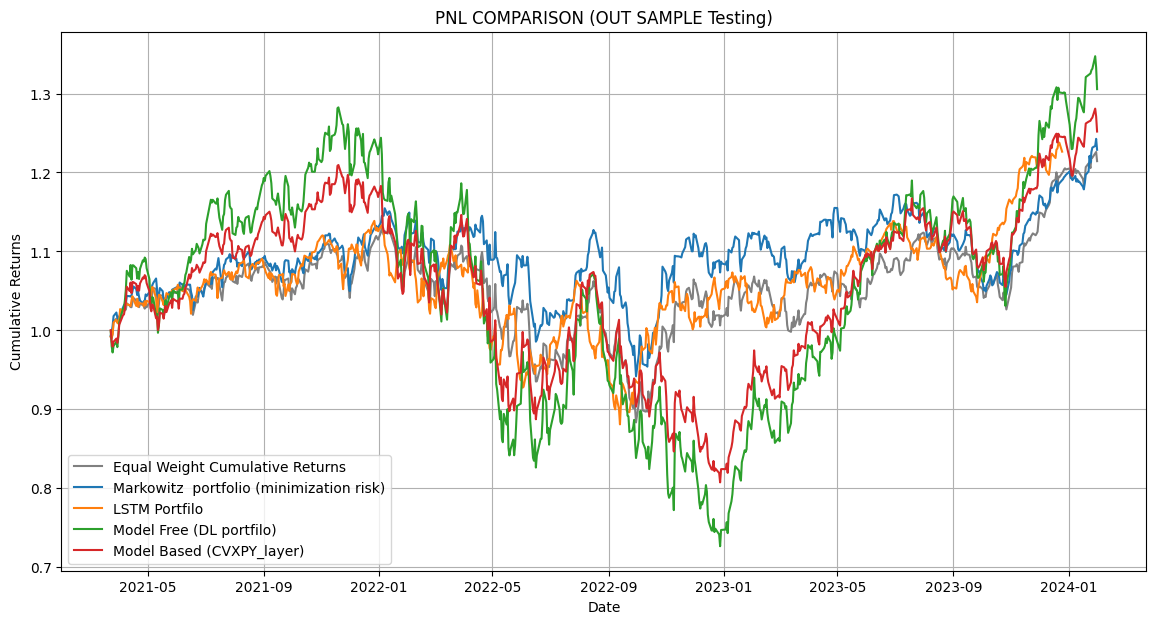

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming the returns dataframe is provided in a similar format as in the screenshot
returns_data = tr_returns

dates = pd.date_range(start='2005, 1, 1', periods=len(returns_data['AAPL']), freq='B')
returns_df = pd.DataFrame(data=returns_data, index=dates)

# Equal weight
equal_weights = np.array([1/num_stocks] * num_stocks) # Equal weights for 5 assets
equal_weighted_returns = (te_returns * equal_weights).sum(axis=1)
cumulative_equal_weighted_returns = (1 + equal_weighted_returns).cumprod()

# Optimal weights
optimal_weights = w_opt_1
optimal_weighted_returns = (te_returns * optimal_weights).sum(axis=1)
cumulative_optimal_weighted_returns = (1 + optimal_weighted_returns).cumprod()


# Optimal weights2
optimal_weights2 = convexopt_portfolio_weights
optimal_weighted_returns2 = (te_returns * optimal_weights2).sum(axis=1)
cumulative_optimal_weighted_returns2 = (1 + optimal_weighted_returns2).cumprod()



# Optimal weights3
optimal_weights3 = w_opt_3
optimal_weighted_returns3 = (te_returns * optimal_weights3).sum(axis=1)
cumulative_optimal_weighted_returns3 = (1 + optimal_weighted_returns3).cumprod()


# Plotting the cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(cumulative_equal_weighted_returns, label='Equal Weight Cumulative Returns',color = "grey")
plt.plot(cumulative_optimal_weighted_returns, label='Markowitz  portfolio (minimization risk)')
plt.plot(overall_cumulative_returns, label='LSTM Portfilo')
plt.plot(cumulative_optimal_weighted_returns3, label='Model Free (DL portfilo)')
plt.plot(cumulative_optimal_weighted_returns2, label='Model Based (CVXPY_layer)')


plt.title('PNL COMPARISON (OUT SAMPLE Testing)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


ew_metrics = annualize_metrics(cumulative_equal_weighted_returns, risk_free_rate)
opt1_metrics = annualize_metrics(cumulative_optimal_weighted_returns, risk_free_rate)
opt2_metrics = annualize_metrics(optimal_weighted_returns2, risk_free_rate)
rolling_metrics = annualize_metrics(pd.Series(rolling_portfolio_daily_returns), risk_free_rate)